In [1]:
#Importing independencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive


In [2]:
#Mount google drive and load the data
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Datasets/HR_comma_sep.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# **Data PreProcessing:**

---
---

> 1- Chnage the position of (Dependent Variable: 'left') attribute to last index in dataset


> 2- Removing all the Duplicate Values

> 3- Checking for Null values and Data types.



> 4- Checking for unique values and changing data types of categorical variables









In [4]:
#Moving the dependent variable to the LAST INDEX in our Dataset
dataset.insert(len(dataset.columns)-1, 'left_target', dataset.pop('left'))


In [5]:
#Show stats of our data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left_target            14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
dataset.duplicated().sum()


3008

In [7]:
#Removing the duplicate values
dataset.drop_duplicates(inplace = True)
print("Duplicated rows: ", dataset.duplicated().sum())
print("Remaining rows: ", dataset.size)

Duplicated rows:  0
Remaining rows:  119910


In [8]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left_target
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [9]:
#Checking all the unique values
for column in dataset.columns:
    print(column, ' = ', dataset[column].nunique(), ' unique values')



satisfaction_level  =  92  unique values
last_evaluation  =  65  unique values
number_project  =  6  unique values
average_montly_hours  =  215  unique values
time_spend_company  =  8  unique values
Work_accident  =  2  unique values
promotion_last_5years  =  2  unique values
Department  =  10  unique values
salary  =  3  unique values
left_target  =  2  unique values


In [10]:
# Turning these features datatypes to 'category' to make a group and analyze them
for attribute in ['Work_accident', 'promotion_last_5years', 'Department', 'salary']:
    dataset[attribute] = dataset[attribute].astype('category')
dataset.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident            category
promotion_last_5years    category
Department               category
salary                   category
left_target                 int64
dtype: object

# **Exploaratory Data Analysis**







---



---




1.   Draw Bar plot of every categorical variable with target variable to check each relation.
2.   Draw the Heat Map to check the correlation between variables



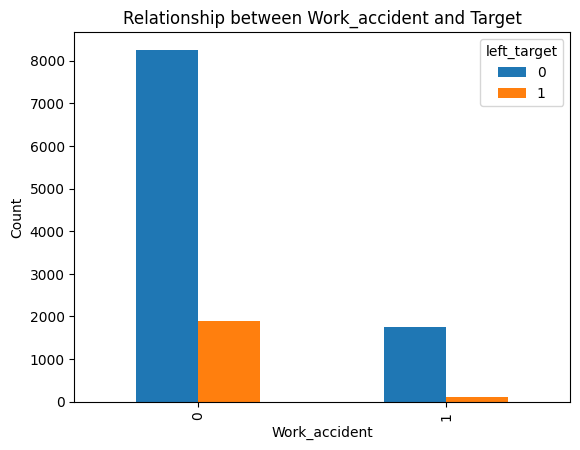

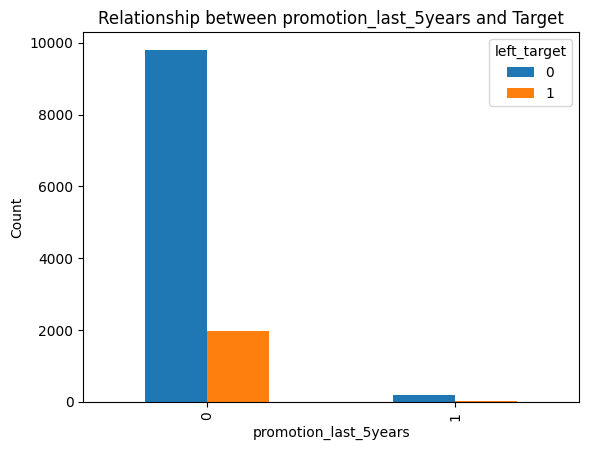

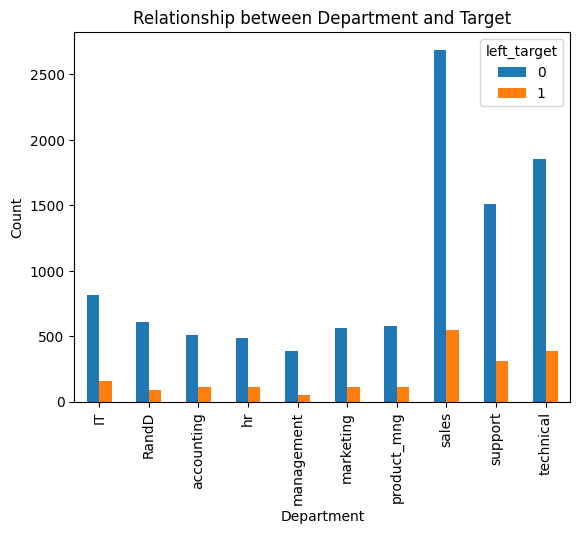

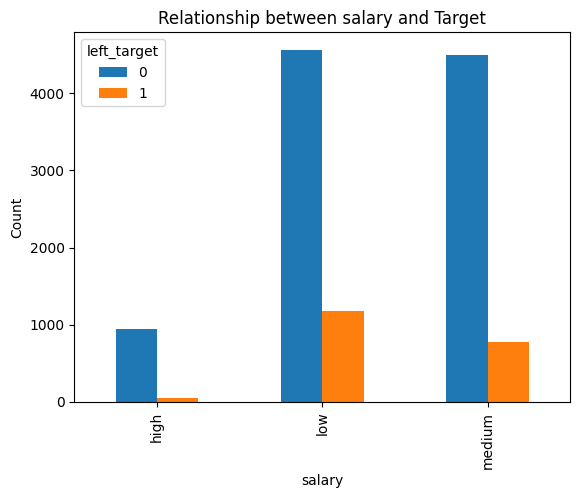

In [11]:
#Checking relationship of categorical variables with employee retension.
categorical_variables = [column for column in dataset.columns if dataset[column].dtype =='category']

# Group each variable with the target variable
for column in categorical_variables:
    count = dataset.groupby([column, 'left_target'])['left_target'].count().unstack()

    # Create a bar chart of each variable
    count.plot.bar()
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Relationship between ' + column + ' and Target')
    plt.show()
    print()


<ipython-input-12-bda415614945>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


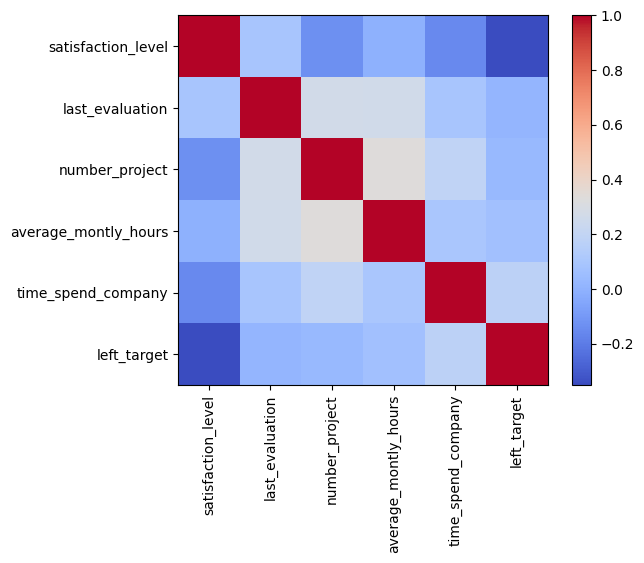

In [12]:
#HEATMAP to visualize the correlation
corr = dataset.corr()
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()


In [13]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left_target
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,-0.350558
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,0.013520
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,0.030928
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,0.070409
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.173295
left_target,-0.350558,0.013520,0.030928,0.070409,0.173295,1.000000


In [14]:
#Turn these features into one-hot encoded features
dataset = pd.get_dummies(data = dataset, columns = ['Work_accident', 'promotion_last_5years', 'Department'],drop_first= True)

#Turn this feature to simple label encoded
dataset.salary = dataset.salary.map({'low':0, 'medium':1, 'high':2})


In [15]:
#Moving the dependent variable to the LAST INDEX in our Dataset
dataset.insert(len(dataset.columns)-1, 'left_target', dataset.pop('left_target'))


In [16]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary,Work_accident_1,promotion_last_5years_1,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left_target
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,1


<ipython-input-17-9ffb6212cba2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


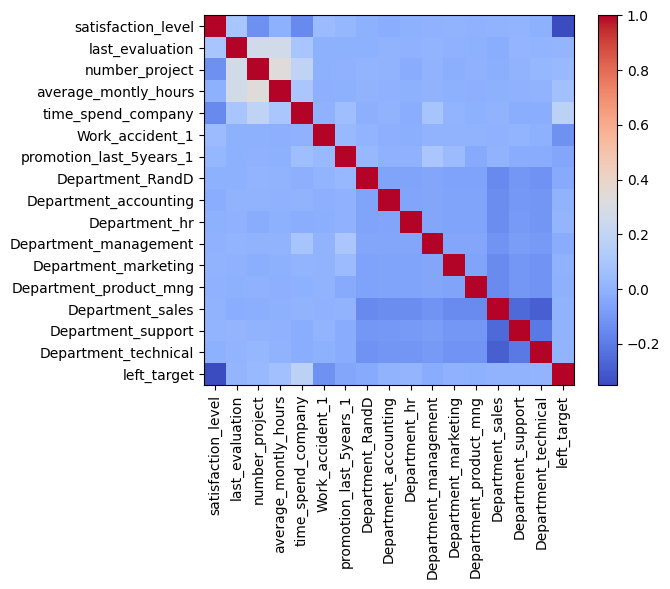

In [17]:
#HEATMAP
corr = dataset.corr()
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()


In [18]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident_1,promotion_last_5years_1,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left_target
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,0.019789,-0.002552,-0.021056,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426,-0.350558
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,-0.007206,-0.005448,0.007244,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859,0.013520
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,-0.000544,0.010077,0.006286,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,0.030928
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,-0.004964,0.004159,0.001938,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,0.070409
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.056828,-0.008380,0.006910,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051,0.173295
Work_accident_1,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,0.029852,0.011793,-0.009178,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,-0.125436
promotion_last_5years_1,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,1.000000,0.025610,-0.001497,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,-0.044657
Department_RandD,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,0.025610,1.000000,-0.057925,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.029016
Department_accounting,-0.021056,0.007244,0.006286,0.001938,0.006910,-0.009178,-0.001497,-0.057925,1.000000,-0.053684,-0.045397,-0.056989,-0.057569,-0.142173,-0.098892,-0.112135,0.005955
Department_hr,-0.007348,-0.001354,-0.025142,-0.005197,-0.018757,-0.013463,0.002446,-0.056934,-0.053684,1.000000,-0.044620,-0.056014,-0.056585,-0.139742,-0.097201,-0.110218,0.013567


In [19]:
dataset = dataset.drop([ 'number_project', 'average_montly_hours'], axis=1)

In [24]:
#Assigning the dependent and independent variables
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [25]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [26]:
# Train the model and pass the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [27]:
#Check the Accuracy of our model
from sklearn.metrics import accuracy_score, f1_score
print("Model's Accuracy is: ", model.score(X_test, y_test))


Model's Accuracy is:  0.8475650433622415


So Our model is accurate almost 85% of the time on the test dataset.